# Netflix Movie Data Exploratory Analysis

**Background**

We are going to analyse Netflix Movie Data provided by Kaggle.
[Source](https://www.kaggle.com/shivamb/netflix-shows) of dataset.

This analysis covers data manipulation, computationa and visualization and insights from exploratory analysis.

Analysis will be based in Python. NumPy and pandas are used for data manipulation, Matplotlip and wordcloud for data visualization

# Exploring Dataset

In [47]:
# import libraries

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [48]:
# load data to dataframe
df = pd.read_csv("netflix_dataset.csv", index_col=0)

In [49]:
# first 5 rows of the dataset
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [50]:
# check number of rows and columns
df.shape

(8807, 11)

The Dataset has 8807 rows and 11 features

In [51]:
# check the data type and number of rows for each features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


All features are object except 'release_year' is integer. 'date_added' is not in correct data type

In [52]:
# check variable statistics
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


"Year" is the only numerical variable in the dataset

In [53]:
# check unique
df.nunique()

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

"Title" is the unique key in the dataset

In [54]:
# check missing data
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [55]:
# missing data percentage
for column_label in df.columns:
    null_rate = df[column_label].isna().sum() / len(df) * 100
    if null_rate >0:
        print("{} null rate : {}%".format(column_label, round(null_rate,2)))

director null rate : 29.91%
cast null rate : 9.37%
country null rate : 9.44%
date_added null rate : 0.11%
rating null rate : 0.05%
duration null rate : 0.03%


"direcrtor" null rate is the highest with almost one third of the data missing

In [56]:
# frequency table of country
pd.crosstab(df['country'],'counts')

col_0,counts
country,
", France, Algeria",1
", South Korea",1
Argentina,56
"Argentina, Brazil, France, Poland, Germany, Denmark",1
"Argentina, Chile",2
...,...
Venezuela,1
"Venezuela, Colombia",1
Vietnam,7


Multiple countries on the same row. Need to be cleaned up in Data Cleaning stage for the choropleth map

In [57]:
# frequency table of title
pd.crosstab(df['title'],'counts')

col_0,counts
title,
#Alive,1
#AnneFrank - Parallel Stories,1
#FriendButMarried,1
#FriendButMarried 2,1
#Roxy,1
...,...
忍者ハットリくん,1
海的儿子,1
마녀사냥,1


In [58]:
# frequency table of director
pd.crosstab(df['director'],'counts')

col_0,counts
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [59]:
# frequency table of cast
pd.crosstab(df['cast'],'counts')

col_0,counts
cast,
"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola, Funmi Eko, Keppy Ekpenyong",1
"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, INFINITE, KARA, Shinee, Sistar, VIXX, Nine Muses, BTS, Secret, Topp Dogg",1
"50 Cent, Ryan Phillippe, Bruce Willis, Rory Markham, Jenna Dewan, Brett Granstaff, Randy Couture, Susie Abromeit, Ron Turner, James Remar",1
"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasciore, Jake Johnson, Lauren Lapkus, Zachary Levi, BD Wong, David Gunning",1
A.R. Rahman,1
...,...
"İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cengiz Bozkurt",1
"İbrahim Çelikkol, Belçim Bilgin, Alican Yücesoy, Teoman Kumbaracıbaşı, Serdar Yeğin, Tülay Günal, Gözde Cığacı, Ferit Aktuğ, Rojda Demirer, Aybars Kartal Özson",1
"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre Karayel, Duygu Yetiş, Onur Buldu, Salih Kalyon, Bilge Şen, Nilgün Belgün, Hakan Akın",1


In [60]:
# frequency table of listed_in
pd.crosstab(df['listed_in'],'counts')

col_0,counts
listed_in,
Action & Adventure,128
"Action & Adventure, Anime Features",1
"Action & Adventure, Anime Features, Children & Family Movies",4
"Action & Adventure, Anime Features, Classic Movies",2
"Action & Adventure, Anime Features, Horror Movies",1
...,...
"TV Horror, TV Mysteries, Teen TV Shows",1
"TV Horror, Teen TV Shows",2
"TV Sci-Fi & Fantasy, TV Thrillers",1


In [61]:
# frequency table of description
pd.crosstab(df['description'],'counts')

col_0,counts
description,
"""Bridgerton"" cast members share behind-the-scenes stories from the hit show, plus comedian Nikki Glaser breaks down the costume drama's sexiest moments.",1
"""Brooklyn Nine-Nine"" star Chelsea Peretti showcases her diverse talents in this dark yet silly reimagining of the comedy special.",1
"""Daily Show"" host Trevor Noah touches on tacos, runaway snakes, camping, racism immunity and lessons he learned from his mother in this comedy special.",1
"""Everybody Loves Raymond"" creator Phil Rosenthal travels the globe to take in the local cuisine and culture of Bangkok, Lisbon, Mexico City and more.",1
"""Friends with benefits"" Emma and Adam are fine with their open relationship ... until those pesky little things called feelings enter the picture.",1
...,...
Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,1
"Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.",1
"Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.",1


In [62]:
# frequency table of rating
pd.crosstab(df['rating'],'counts')

col_0,counts
rating,
66 min,1
74 min,1
84 min,1
G,41
NC-17,3
NR,80
PG,287
PG-13,490
R,799


We found that there are noisy data (66 min, 75 min and 84 min) which are not ratings label

In [63]:
# frequency table of duration
pd.crosstab(df['duration'],df['type'])

type,Movie,TV Show
duration,,
1 Season,0,1793
10 Seasons,0,7
10 min,1,0
100 min,108,0
101 min,116,0
...,...,...
95 min,137,0
96 min,130,0
97 min,146,0


Duration needs to be analysed separately for Movie and TV Show as the measuring unit is different

# Data Cleaning

We will replace missing data with N/A for 'director', 'cast', 'country' which have most missing value in the dataset.

In [64]:
# fill NA for "director", "cast" and "country" missing value
df['director'].fillna("N/A", inplace = True)
df['cast'].fillna("N/A", inplace = True)
df['country'].fillna("N/A", inplace = True)

Then, for 'date_added','rating','duration' which have few missing value, we will drop it.

In [65]:
# Drop remaining records with missing value
df.dropna(inplace=True)

In [66]:
# check missing data
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now, we have a clean dataset. Then we will correct variable type and create derived variables

In [67]:
# convert 'date_added' from object to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# create derived variable 'year_added'
df['year_added'] = df['date_added'].dt.year

# check
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,N/A,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
s2,TV Show,Blood & Water,N/A,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
s4,TV Show,Jailbirds New Orleans,N/A,N/A,N/A,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
s5,TV Show,Kota Factory,N/A,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


# Exploration and Visualization

**Distributions between Movie and Shows**

In [68]:
# netflix color palette
palette = ['#221f1f', '#b20710', '#e50914','#f5f5f1']

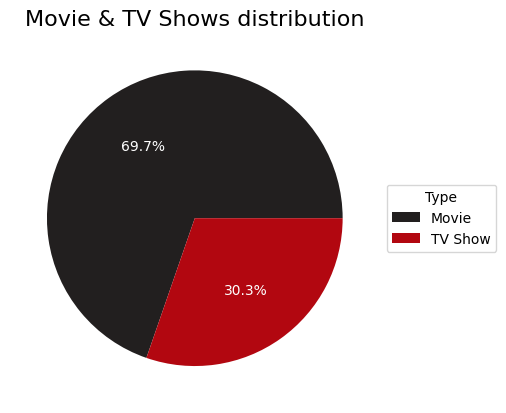

In [69]:
# create a pie chart to present type distribution

# count the types
counts = df['type'].value_counts()

# create pie chart with data labels and color palette
pie = counts.plot(kind='pie', autopct='%1.1f%%', colors=palette, textprops={'color':"w"})

# set data label properties
pie.set_ylabel('')
pie.set_title('Movie & TV Shows distribution', fontsize=16)
pie.legend(title='Type', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The pie chart indicates that the number of Movies on Netflix is much more than TV Shows

**Number of contents availalbe on Netflix by year**

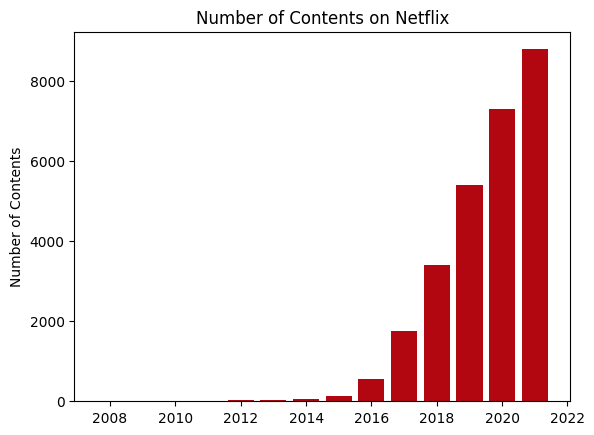

In [70]:
# calculate the number of title by year_added
title_counts = df.groupby('year_added')['title'].count()

# calculate the cumulative number of titles
cumulative_title_counts = title_counts.cumsum()

# create bar chart
fig, ax = plt.subplots()
ax.bar(cumulative_title_counts.index, cumulative_title_counts, color = '#b20710')

# add labels and title
ax.set_ylabel('Number of Contents')
ax.set_title('Number of Contents on Netflix')

plt.show()

Total number of contents including Movies and TV Shows have increased siginificantly since 2015. As of mid of 2021, there are around 8500 contents available on Netflix

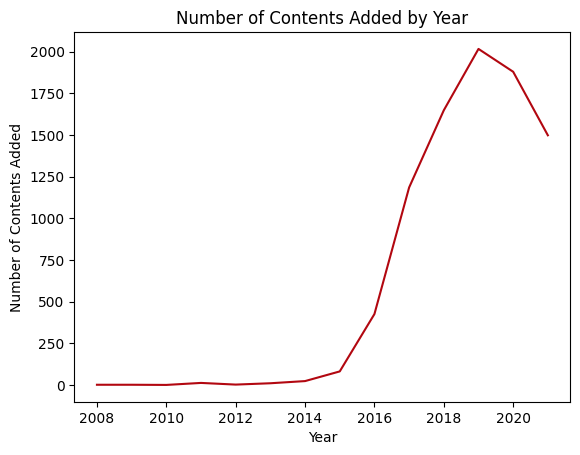

In [71]:
# line chart for number of contents added by year
x = title_counts.index
y = title_counts

plt.plot(x,y,color = '#b20710')
plt.xlabel('Year')
plt.ylabel('Number of Contents Added')
plt.title('Number of Contents Added by Year')
plt.show()

The contents increased sharply from 2014 and dropped in 2019. The decline is probably due to pandemic outbreak.

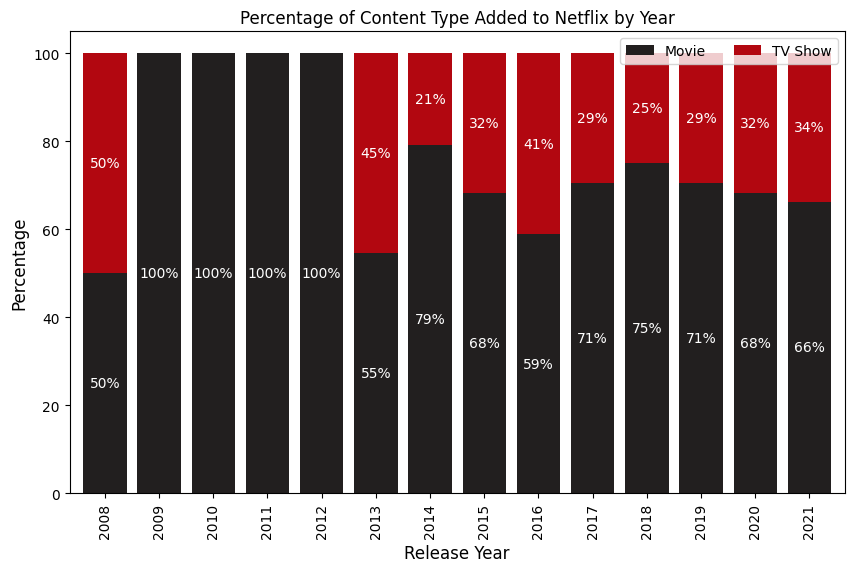

In [72]:
# Group the data by release year and type, and calculate the total duration for each group
title_counts_type = df.groupby(['year_added', 'type'])['title'].count()

# calculate percentage of each type of content for each release year
percentage_type = title_counts_type.unstack().apply(lambda x: 100 * x / title_counts)

# create stacked bar chart
ax = percentage_type.plot(kind='bar', stacked=True, figsize=(10,6),width=0.8, color=palette)

# add data labels to each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f'{val:.0f}%' if val > 0 else '' for val in container.datavalues], fontsize=10, color='white')

# add legend and axis labels
ax.legend(fontsize=10, loc='upper right', ncol=2)
ax.set_xlabel('Release Year', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Percentage of Content Type Added to Netflix by Year')

plt.show()

Overall, it seems that there was a period of time where only movies were being added (2009-2012), but in recent years there has been a shift towards a more balanced mix of movies and TV shows being added. The percentage of TV Show added has steadily increased since 2018

**Distribution of Netflix's Movie/Show by countries**

Firstly, we need to tidy up country name which consists of multiple value on the same row

In [73]:
# create a subset, remove leading and trailing space, separate multiple countries on the same row
country_counts = df['country'].apply(lambda x: [country.strip() for country in x.split(',')])
country_counts = country_counts.explode('country')

# count the frequency of each country
country_counts = country_counts.value_counts().reset_index()

# rename the columns of the new DataFrame
country_counts.columns = ['country', 'counts']

Then, we can visualize number of contents produced by countries

In [74]:
# Create Choropleth Graph

# maximum count of country
max_count = country_counts ['counts'].max()

# create the choropleth map
fig = px.choropleth(country_counts, locations = 'country', locationmode = 'country names',color = 'counts', title='Number of Contents by Country', scope='world', range_color = [0, max_count], color_continuous_scale=[(0, "#F5F5F1"),(1,'#b20710')])

fig.show()

From the map, we can see that most of the Movies/TV Shows produced in the United States

**Distribution of Netflix's Movie/Show by genre**

The genre is under listed_in field which has multiple genre tag on each rows. We will clean it up and count how many genre tags

In [75]:
# create a subset, remove leading and trailing space, separate multiple countries on the same row
genre_counts = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
genre_counts = genre_counts.explode('listed_in')

# count the occurrences of each country
genre_counts = genre_counts.value_counts().reset_index()

# rename the columns of the new DataFrame
genre_counts.columns = ['genre', 'counts']

# create derived group to show only top 10 genres and group the rest as others
top_countries = genre_counts.iloc[:10, 0].tolist()
genre_counts['genre_group'] = genre_counts['genre'].apply(lambda x: x if x in top_countries else 'Others')

Then, we can visualize the number of of genre tags and sort it in decesending order

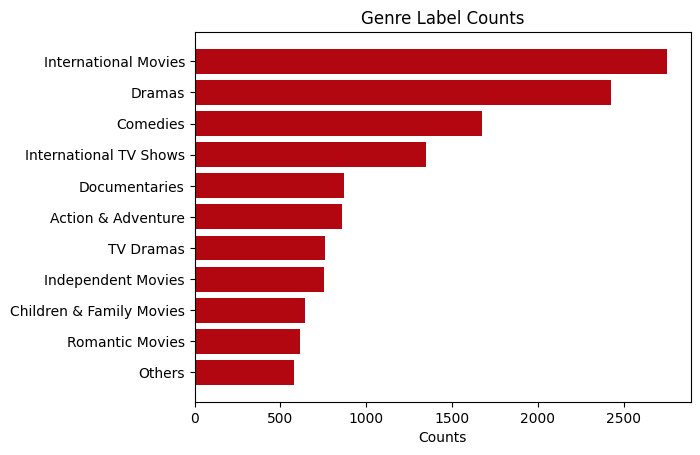

In [76]:
# create bar chart to show genre type

# sort genre_counts by the counts column in descending order
genre_counts = genre_counts.sort_values('counts', ascending=True)

x = genre_counts['genre_group']
y = genre_counts['counts']

plt.barh(x,y, color='#b20710')
plt.xlabel('Counts')
plt.title('Genre Label Counts')
plt.show()

Top 3 genre is International Movies, Dramas and Comedies. Noted that each movie could be tagged with multiple genre labels. This chart is showing the frequency of genre labels.

**Visualize Movie and TV shows descriptions.**

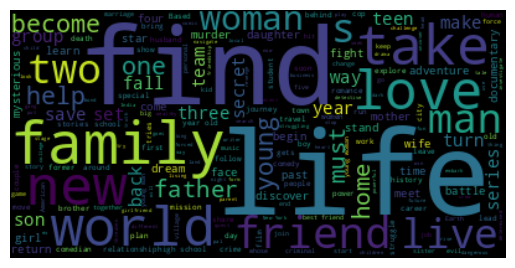

In [77]:
# combine all descriptions into one text
text_description = " ".join(words for words in df.description)

# Create stopword list:
stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud_description = WordCloud(stopwords=STOPWORDS).generate(text_description)

# Display the generated image:
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis("off")
plt.show()

The description wordcloud shows keywords such as "find, family, life, world, love, friends, help" appears most in Movie/TV Shows description. In other words, these keywords indicate the most common theme of contents on Netflix

**Duration Exploration**

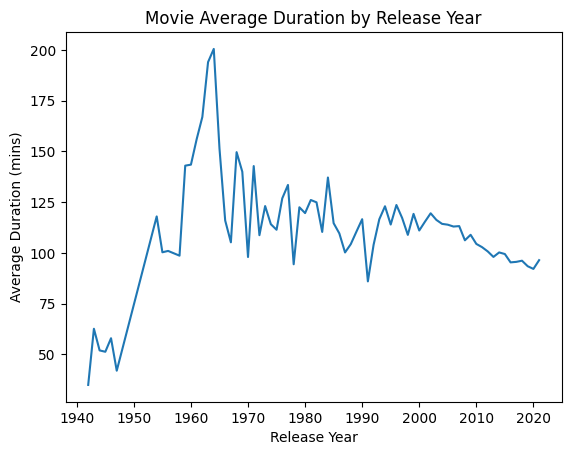

In [78]:
# remove duration unit
df['duration_num'] = df.duration.str.extract('(\d+)').astype(int)

# Group the data by release year and type, and calculate the average duration for each group
average_duration = df.groupby(['release_year', 'type'])['duration_num'].mean().unstack()

# Plot the average movie duration by year
plt.plot(average_duration.index, average_duration['Movie'])

# Add labels and a legend
plt.xlabel('Release Year')
plt.ylabel('Average Duration (mins)')
plt.title('Movie Average Duration by Release Year')

# Display the plot
plt.show()

We can see that there is a sharp increase of duration for movie released between 1940 to 1960. Then, it fluctuatues between the range of 100-150mins. Recently, the duration of movie gradually reducing to around 100-125mins.

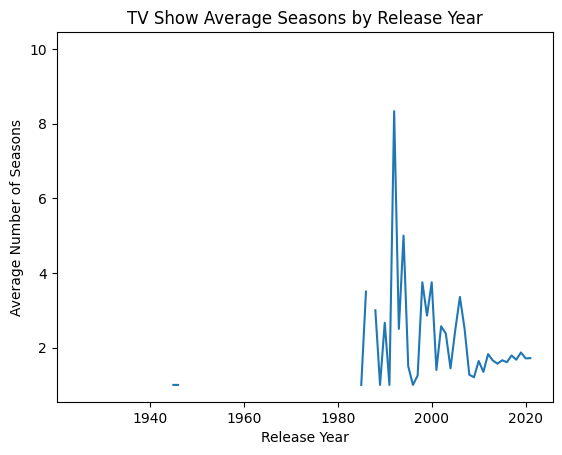

In [79]:
# Plot the average movie duration by year
plt.plot(average_duration.index, average_duration['TV Show'], label='TV Show')

# Add labels and a legend
plt.xlabel('Release Year')
plt.ylabel('Average Number of Seasons')
plt.title('TV Show Average Seasons by Release Year')

# Display the plot
plt.show()

There is no obvious pattern found for TV Shows'average number of seasons. After 2000, the number of seasons tends to be below 4.

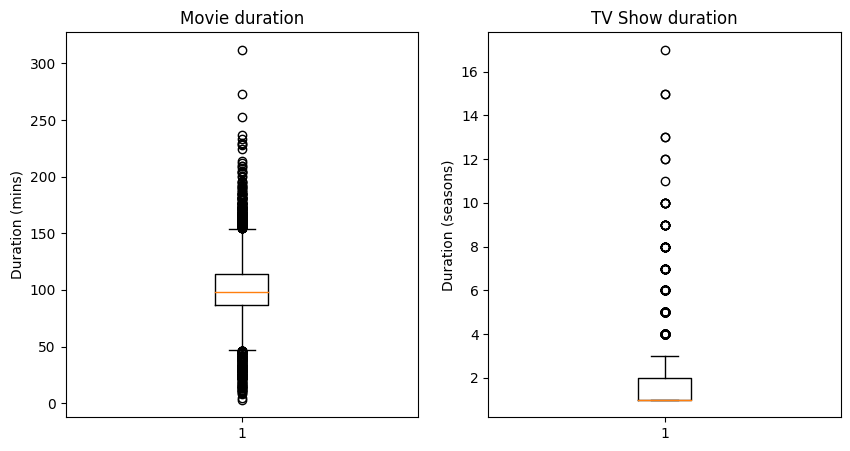

In [80]:
# boxplot chart

# create two subplots for movies and shows
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# separate the data for movies and shows
movies_duration = df[df['type']=='Movie']['duration_num']
shows_duration = df[df['type']=='TV Show']['duration_num']

# plot boxplots for movies and shows
ax1.boxplot(movies_duration)
ax1.set_title('Movie duration')
ax1.set_ylabel('Duration (mins)')

ax2.boxplot(shows_duration)
ax2.set_title('TV Show duration')
ax2.set_ylabel('Duration (seasons)')

# show the plot
plt.show()

It indicates that most of the movie duration within 90-120mins while TV Show mostly below 2 seasons

**Exploration on Director and Casting**

In [81]:
# create a subset, remove leading and trailing space, separate multiple countries on the same row
cast_counts = df['cast'].apply(lambda x: [cast.strip() for cast in x.split(',')])
cast_counts = cast_counts.explode('cast')

# count the occurrences of each country
cast_counts = cast_counts.value_counts().reset_index()

# rename the columns of the new DataFrame
cast_counts.columns = ['cast', 'counts']

# Filter out N/A and top 10 only
cast_counts = cast_counts[cast_counts['cast']!='N/A'].head(10)

# do the same for director
director_counts = df['director'].apply(lambda x: [director.strip() for director in x.split(',')])
director_counts = director_counts.explode('director')
director_counts = director_counts.value_counts().reset_index()
director_counts.columns = ['director', 'counts']
director_counts = director_counts[director_counts['director']!='N/A'].head(10)

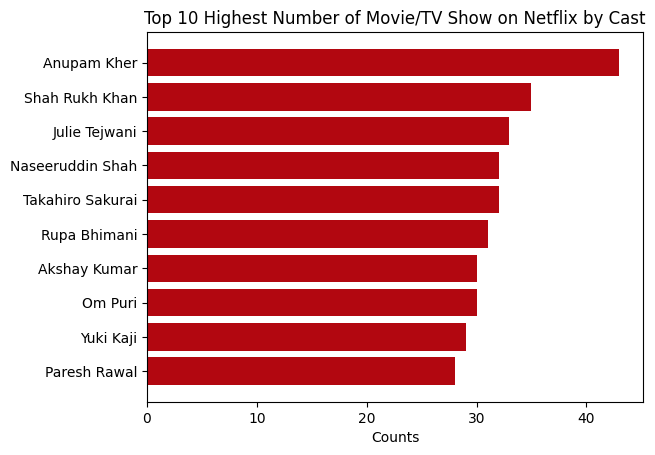

In [82]:
# sort genre_counts by the counts column in descending order
cast_counts = cast_counts.sort_values('counts', ascending=True)

x = cast_counts['cast']
y = cast_counts['counts']

plt.barh(x,y, color='#b20710')
plt.xlabel('Counts')
plt.title('Top 10 Highest Number of Movie/TV Show on Netflix by Cast')
plt.show()

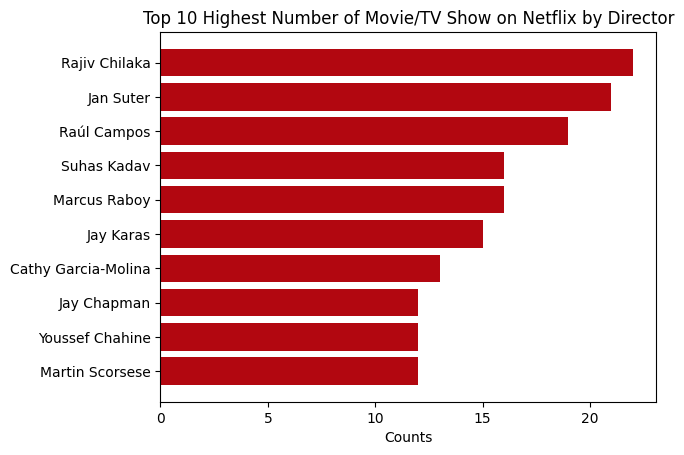

In [83]:
# sort genre_counts by the counts column in descending order
director_counts = director_counts.sort_values('counts', ascending=True)

x = director_counts['director']
y = director_counts['counts']

plt.barh(x,y, color='#b20710')
plt.xlabel('Counts')
plt.title('Top 10 Highest Number of Movie/TV Show on Netflix by Director')
plt.show()

**Rating Exploration**

Visualize ratings

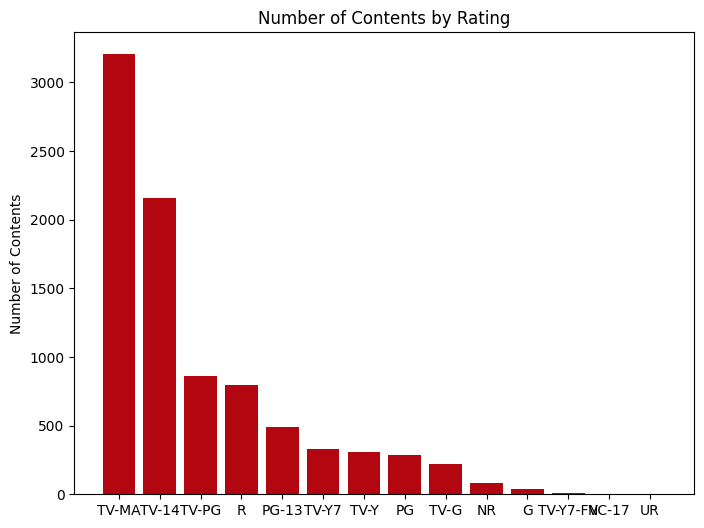

In [84]:
# create bar chart

rating_count = df['rating'].value_counts()

x = rating_count.index
y = rating_count

plt.figure(figsize=(8,6))
plt.bar(x,y,color='#b20710')
plt.ylabel('Number of Contents')
plt.title('Number of Contents by Rating')
plt.show()


In the dataset, there are a several ratings for Movies and TV which is not easy to interpret. We will group them into four rating groups: all_ages, parental_guide, adult_only, not_rated

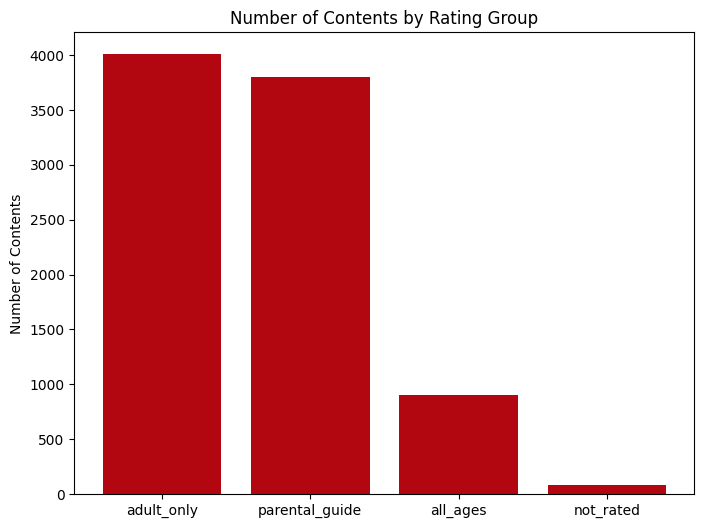

In [85]:
# create dictionary for rating
rating_group_dic = {
    'G':'all_ages',
    'TV-Y':'all_ages',
    'TV-Y7':'all_ages',
    'TV-Y7-FV':'all_ages',
    'TV-G':'all_ages',
    'PG':'parental_guide',
    'PG-13':'parental_guide',
    'TV-PG':'parental_guide',
    'TV-14':'parental_guide',
    'R':'adult_only',
    'NC-17':'adult_only',
    'TV-MA':'adult_only',
    'NR':'not_rated',
    'UR':'not_rated'
}

# create a new column for rating_group
df['rating_group'] = df['rating'].apply(lambda x: rating_group_dic[x])

# create new bar chart
rating_group_count = df['rating_group'].value_counts()

x = rating_group_count.index
y = rating_group_count

plt.figure(figsize=(8,6))
plt.bar(x,y,color='#b20710')
plt.ylabel('Number of Contents')
plt.title('Number of Contents by Rating Group')
plt.show()


It is now clear that a majority of contents on Netflix is Adult only and Parental Guide, with both rating having similar number of contents. 

# Key Insights

- Netflix offers a wide variety of content, with over two-thirds of its offerings being movies. However, in recent years, Netflix has been investing more in TV shows, indicating from a increase in the percentage of TV shows compared to movies.
- The majority of content on Netflix is produced in the United States, with India being the second largest contributor.
- The top three categories of content are international movies, dramas, and comedies. The theme of contents are mostly related to keyword “find, family, life, world, love, friends, help”.
- The duration of movies on Netflix has been decreasing in recent years, with most movies now being between 100-125 minutes long. Additionally, the majority of TV shows on Netflix have less than 2 seasons.
- The majority of contents are parental-guided or adult-only rating.
